In [1]:
%pip install tensorflow
%pip install seaborn
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os

#base settings

baseDir = "./datasets/VegetableDataset/"
os.listdir(baseDir)

batch_size = 32
image_size = 32 # use a model with this size

In [4]:
import tensorflow as tf

# Load training and validation datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    baseDir + "train",
    labels="inferred", #figure out the values
    label_mode="categorical",  # Use categorical for multi-class classification
    image_size=(image_size,image_size),
    batch_size=batch_size,
    shuffle=True,
    seed=42            
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    baseDir + "dev",
    labels="inferred",
    label_mode="categorical",
    image_size=(image_size,image_size),
    batch_size=batch_size,
    shuffle=True,
    seed=42
)

# Test dataset (assuming separate directory for test data)
test_ds = tf.keras.utils.image_dataset_from_directory(
    baseDir + "test",
    labels="inferred",
    label_mode="categorical",
    image_size=(image_size,image_size),
    batch_size=batch_size,
    shuffle=False  # No shuffling for test set
)

print(train_ds.class_names)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


In [5]:
# define model layers
from tensorflow.keras import layers

model = tf.keras.models.Sequential([
    layers.Rescaling(1./255, input_shape=(image_size, image_size, 3)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(15, activation='softmax')
])

/Users/ame/Library/Python/3.9/lib/python/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208,783 (815.56 KB)

 Trainable params: 208,783 (815.56 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
#compile model

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',  # Suitable for classification
                  metrics=['accuracy'])

In [8]:
epochs = 20
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/20


469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 79ms/step - accuracy: 0.2115 - loss: 2.3997 - val_accuracy: 0.4983 - val_loss: 1.5402
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 79ms/step - accuracy: 0.5468 - loss: 1.4265 - val_accuracy: 0.6653 - val_loss: 1.0965
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.6620 - loss: 1.0489 - val_accuracy: 0.7090 - val_loss: 0.9040
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 118ms/step - accuracy: 0.7328 - loss: 0.8357 - val_accuracy: 0.7690 - val_loss: 0.7314
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 71s 94ms/step - accuracy: 0.7733 - loss: 0.7058 - val_accuracy: 0.7967 - val_loss: 0.6484
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - accuracy: 0.8061 - loss: 0.6162 - val_accuracy: 0.7887 - val_loss: 0.6441
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 104ms/step - accuracy: 0.8301 - loss: 0.5443 - val_accuracy: 0.8380 - val_loss: 0.5302
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.8463 - loss: 0.4896 - val_accu

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9242 - loss: 0.2564


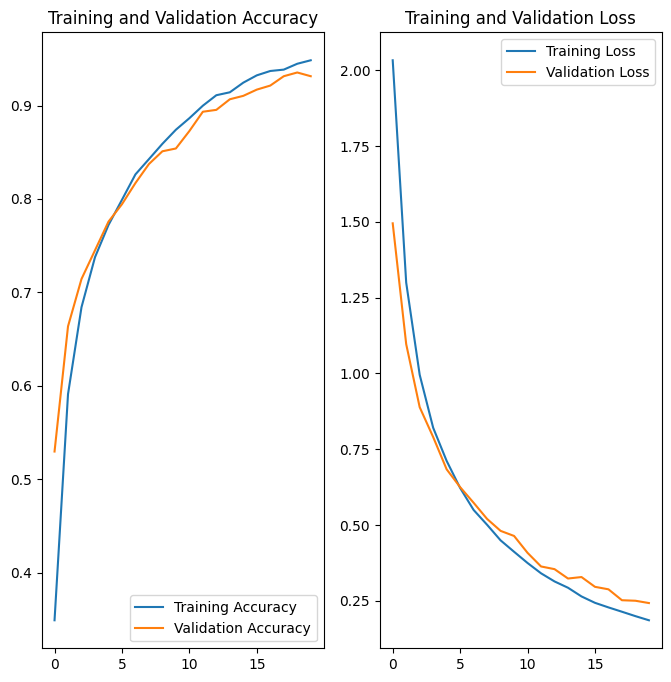

In [19]:
import matplotlib.pyplot as plt

model.evaluate(test_ds)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

2025-07-12 10:41:21.429153: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step
Precision: 0.934
Recall (Sensitivity): 0.932
F1 Score: 0.932


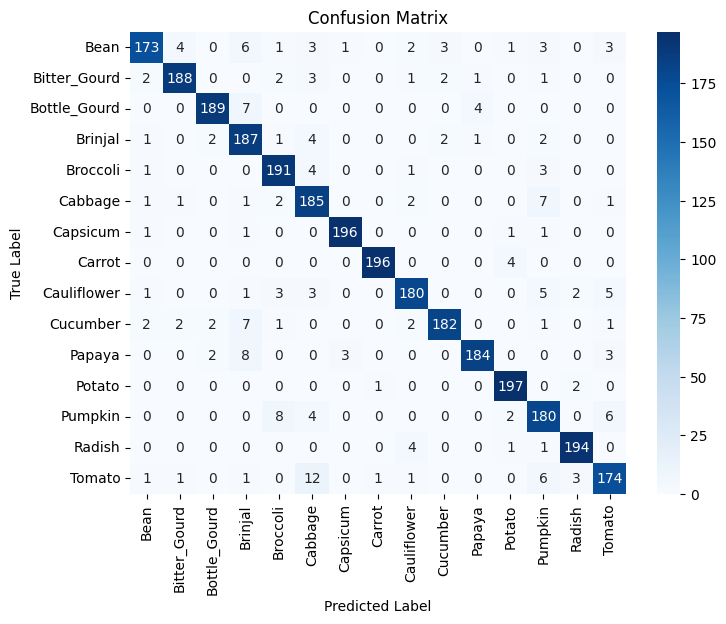

In [20]:
# Get predictions and true labels
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

y_true = []

for images, labels in test_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=1))
y_true = np.array(y_true)

y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate precision, recall, f1-score (macro average)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
print(f"Precision: {precision:.3f}")
print(f"Recall (Sensitivity): {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# Plot confusion matrix
class_names = train_ds.class_names
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [21]:
model.save("./models/customCNN.keras") # This is model saving
model.save_weights("./weights/customCNN.weights.h5") # This is weight saving